# Modeling: 

## XGBoost Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. View and Visualize our dependent variable 'price'](#3._View_and_Visualize_our_dependent_variable_price)
    * [3.1 View the data](#3.1_View_the_data)
    * [3.2 Final Visualization of our dependent Variable 'price'](#3.2_Final_Visualization_of_our_dependent_variable_price)
 * [4. Features Selection: Define/Select Features](#4_Features_Selection:_Define_Select_Features)
 * [5. Train/Test Split](#5_Train/Test_Split)
 * [6. Scaling and Transformation: Standardization](#6_Scaling_and_Transformation:_Standardization)
 * [7. Modeling: XGBoost Regression](#7_XGBoost_Regression)
    * [7.1 Fitting XGBoost Regression](#7.1_Fitting_XGBoost_Regression)
    * [7.2 XGBoost Regression: Residuals Visualization](#7.2_XGBoost_Regression:_Residuals_Visualization)
    * [7.3 XGBoost Regression Model Evaluation](#7.3_XGBoost_Regression_Model_Evaluation)
    * [7.4 Features Selection](#7.4_Features_Selection)
       * [7.4.1 Features Importance](#7.4.1_Features_Importance)
       * [7.4.2 Keeping only 'price_per_sqft' and 'sqft'](#7.4.2_Keeping_only_price_per_sqft_and_sqft)
       * [7.4.3 Keeping 'price_per_sqft', 'sqft', 'median_income' and 'property_type'](#7.4.3_Keeping_price_per_sqft_sqft_median_income_property_type)    
       * [7.4.4 Features Selection Summary](#7.4.4_Features_Selection_Summary)    
    * [7.5 Hyperparameters Tuning: RandomizedSearchCV](#7.5_Hyperparameters_Tuning:_RandomizedSearchCV)
       * [7.5.1 RandomizedSearchCV for all features](#7.5.1_RandomizedSearchCV_for_all_features)
       * [7.5.2 Fitting XGBoost Regression after RandomizedSearchCV (All features)](#7.5.2_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(All_features))
       * [7.5.3 RandomizedSearchCV for most important features: 'sqft' and 'price_per_sqft'](#7.5.3_RandomizedSearchCV_for_most_important_features:_sqft_and_price_per_sqft)
       * [7.5.4 Fitting XGBoost Regression after RandomizedSearchCV (most important features)](#7.5.4_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(most_important_features))
       * [7.5.5 RandomizedSearchCV for most important features: 'sqft', 'price_per_sqft', 'property_type' and 'median_income'](#7.5.5_RandomizedSearchCV_for_most_important_features:_sqft_and_price_per_sqft_property_type_median_income)
       * [7.5.6  Fitting XGBoost Regression after RandomizedSearchCV (Top-4 Features)](#7.5.6_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(Top-4_Features))
 * [8. XGBoost Regression Tuning Summary](#8_XGBoost_Regression_Tuning_Summary)
 * [9. XGBoost Regression Actual vs Prediction Visualization](#9_XGBoost_Regression_Actual_vs_Prediction_Visualization)
 * [10. Models next step](#10_Models_next_step)

## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Linear Regression (Baseline Model).
 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Stacking
 * Neural networks.
 
 
 **In This Notebook, We'll be using XGBoost**



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [5]:
# Changing the directory:
os.chdir(r"path/Feature_Engineering/datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [7]:
# List files/folders in the cd:
os.listdir()

['pre_processing_df.csv']

In [8]:
df = pd.read_csv('pre_processing_df.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 7484 and Columns:  23


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,price,beds,baths,sqft,lot_size,days_on_market,price_per_sqft,hoa_month,...,median_income,hotness_score,supply_score,demand_score,university_count,barts,malls,universities,bedBath,AvgRoomSize
0,1,94568,905000,3,4,1994,0,80,454,388.0,...,119637,83.72,94.25,73.19,0,1,0,0,12,284.857
1,2,94566,645000,2,2,1221,1237,143,528,379.0,...,126782,80.07,79.57,80.57,0,0,1,0,4,305.250
2,1,94588,940000,4,2,1928,2660,148,488,470.0,...,134451,85.91,87.06,84.76,0,1,1,0,8,321.333
3,0,94588,1036000,3,2,1355,7708,66,765,33.0,...,134451,85.91,87.06,84.76,0,1,1,0,6,271.000
4,0,94568,1250000,4,4,3083,3058,143,405,232.0,...,119637,83.72,94.25,73.19,0,1,0,0,16,385.375


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


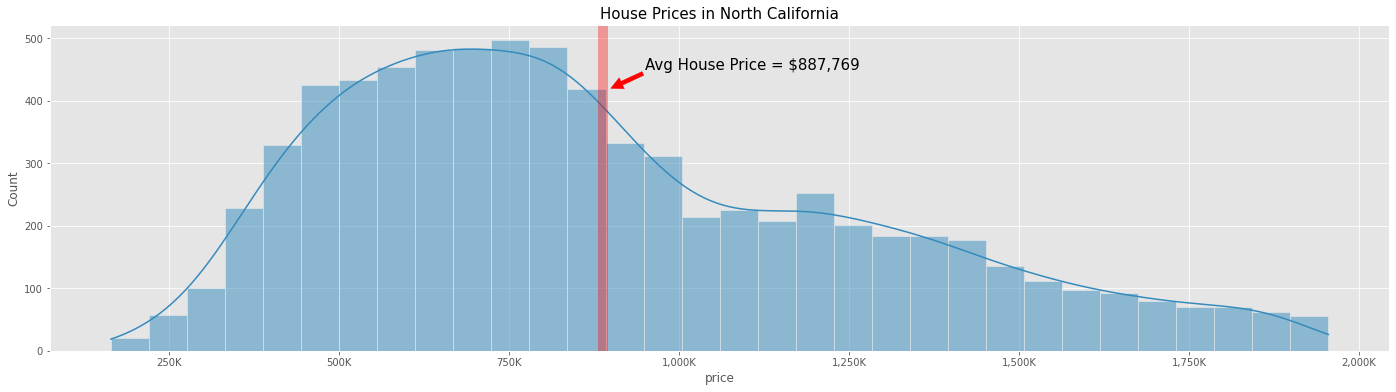

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Features Selection: Define/Select Features<a id='4_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [14]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft','lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month','property_age', 
            'school_rating', 'school_count', 'median_income','hotness_score', 
            'supply_score', 'demand_score', 'university_count','barts', 'malls', 
            'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [16]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling: XGBoost Regression<a id='7_XGBoost_Regression'></a>

**XGBoost** an incredibly popular machine learning library for good reason. It was developed originally as a C++ command-line application. After winning a popular machine learning competition, the package started being adopted within the ML community. As a result, bindings, or functions that tapped into the core C++ code, started appearing in a variety of other languages, including Python, R, Scala, and Julia. We will cover the Python API in this course.

**What makes XGBoost so popular?**
  * **Its speed**: Because the core XGBoost algorithm is parallelizable:
    * It can harness all of the processing power of modern multi-core computers.
    * It is parallelizable onto GPU's and across networks of computers, making it feasible to train models on very large datasets on the order of hundreds of millions of training examples.
  * **It's performance**:
    * It consistently outperforms almost all other single-algorithm methods in machine learning competitions and has been shown to achieve state-of-the-art performance on a variety of benchmark machine learning datasets.



### 7.1 Fitting  XGBoost Regression<a id='7.1_Fitting_XGBoost_Regression'></a>


In [17]:
# Import necessary modules
from xgboost import XGBRegressor

# Create a XGBRegressor: xgb
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
xgb = XGBRegressor() 

# Fit the regressor to the training data
xgb.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(xgb.score(X_test, y_test) * 100), '%')

R-Squared coefficient : 99.3961 %


Base XGBoost Regression R-Squared coefficient is 99.3961 % which is clearly higher than Base GB Regression of 99.1028%

In [18]:
# Predict on the test data: y_pred_xgb
y_pred_xgb = xgb.predict(X_test)

### 7.2 XGBoost Regression: Residuals Visualization<a id='7.2_XGBoost_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

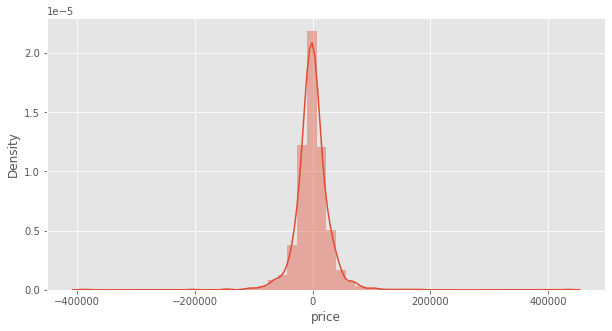

In [19]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_xgb)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 XGBoost Regression Model Evaluation<a id='7.3_XGBoost_Regression_Model_Evaluation'></a>

In [20]:
# Import necessary modules
from sklearn import metrics

print("********XGBoost Regression Model Evaluation********")
print("-------------------------------------------------")
print("XGBoost Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb) * 100), '%')
print("-------------------------------------------------")
print("XGBoost Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb)))
print("-------------------------------------------------")
print("XGBoost Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_xgb)))
print("-------------------------------------------------")
print("XGBoost Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))))
print("-------------------------------------------------")
print("XGBoost Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb) * 100), '%')
print("-------------------------------------------------")

********XGBoost Regression Model Evaluation********
-------------------------------------------------
XGBoost Regression - r2 Score: 99.3961 %
-------------------------------------------------
XGBoost Regression - MAE: 18562.6278
-------------------------------------------------
XGBoost Regression - MSE:892350521.4109
-------------------------------------------------
XGBoost Regression - RMSE:29872.2366
-------------------------------------------------
XGBoost Regression - Variance Score:99.3963 %
-------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 29,872.2366**, which is slightly less than 5% of the mean value of the Sales Price i.e.  $887,769.19. also, we have very good variance score at 99.3963 %. 

This mean that our base XGBoost Regression Model is performing well a head of Base GB Regression Model.


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


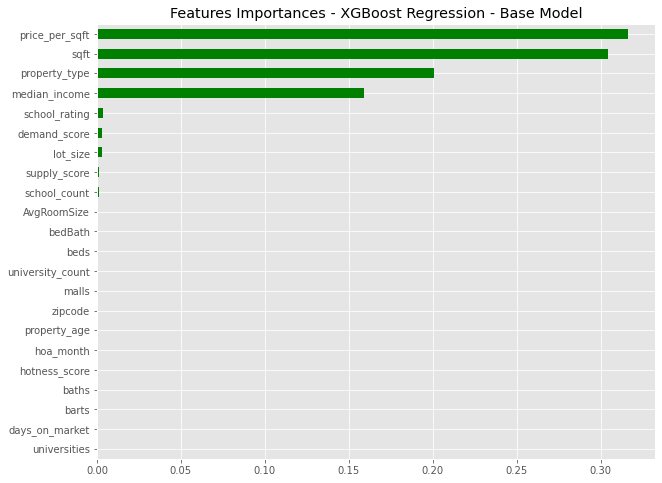

In [21]:
# First, let's create a pd.Series of features importances
importances_xgb = pd.Series(data=xgb.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_xgb.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - XGBoost Regression - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
 * As shown above, the high important features are only: 'price_per_sqft' and 'sqft' so as a first step let's keep them and drop the remaining features.
 * Second, let's keep  'price_per_sqft', 'sqft', 'median_income' and 'property_type'.

 
#### 7.4.2 Keeping only 'price_per_sqft' and 'sqft'<a id='7.4.2_Keeping_only_price_per_sqft_and_sqft'></a> 

In [22]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'sqft', 'price_per_sqft':
features = ['sqft', 'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [24]:
# Create a XGBRegressor: xgb_2
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
xgb_2 = XGBRegressor() 

# Fit the regressor to the training data
xgb_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(xgb_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_xgb_2
y_pred_xgb_2 = xgb_2.predict(X_test)

R-Squared coefficient : 99.6627 %


In [25]:
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned XGBoost Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_2) * 100), '%')
print("-------------------------------------------------------")
print("Tuned XGBoost Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_2)))
print("-------------------------------------------------------")
print("Tuned XGBoost Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_xgb_2)))
print("-------------------------------------------------------")
print("Tuned XGBoost Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_2))))
print("-------------------------------------------------------")
print("Tuned XGBoost Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_2) * 100), '%')
print("-------------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------------
Tuned XGBoost Regression - r2 Score: 99.6627 %
-------------------------------------------------------
Tuned XGBoost Regression - MAE: 12850.6589
-------------------------------------------------------
Tuned XGBoost Regression - MSE:498437095.4752
-------------------------------------------------------
Tuned XGBoost Regression - RMSE:22325.7048
-------------------------------------------------------
Tuned XGBoost Regression - Variance Score:99.6627 %
-------------------------------------------------------


#### 7.4.3 Keeping 'price_per_sqft', 'sqft', 'median_income' and 'property_type'<a id='7.4.3_Keeping_price_per_sqft_sqft_median_income_property_type'></a> 

In [26]:
df.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [27]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating':
features = ['sqft', 'price_per_sqft', 
            'property_type', 'median_income']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [28]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [29]:
# Create a XGBRegressor: xgb_4
# Default: max_depth=3, n_estimators=100 and learning_rate=0.1
xgb_4 = XGBRegressor() 

# Fit the regressor to the training data
xgb_4.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(xgb_4.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_xgb_4
y_pred_xgb_4 = xgb_4.predict(X_test)

R-Squared coefficient : 99.5752 %


In [30]:
print("********Tuned_4 XGBoost Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned_4 XGBoost Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_4) * 100), '%')
print("-------------------------------------------------------")
print("Tuned_4 XGBoost Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_4)))
print("-------------------------------------------------------")
print("Tuned_4 XGBoost Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_xgb_4)))
print("-------------------------------------------------------")
print("Tuned_4 XGBoost Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_4))))
print("-------------------------------------------------------")
print("Tuned_4 XGBoost Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_4) * 100), '%')
print("-------------------------------------------------------")

********Tuned_4 XGBoost Regression Model Evaluation********
-------------------------------------------------------
Tuned_4 XGBoost Regression - r2 Score: 99.5752 %
-------------------------------------------------------
Tuned_4 XGBoost Regression - MAE: 14938.3076
-------------------------------------------------------
Tuned_4 XGBoost Regression - MSE:627600695.7750
-------------------------------------------------------
Tuned_4 XGBoost Regression - RMSE:25051.9599
-------------------------------------------------------
Tuned_4 XGBoost Regression - Variance Score:99.5752 %
-------------------------------------------------------


#### 7.4.4 Features Selection Summary<a id='7.4.4_Features_Selection_Summary'></a>

As we can see below, when we're keeping 2 features ('sqft', 'price_per_sqft'): we're seeing the best Result for XGBoost Regression:

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|99.3961 %|18562.6278|892350521.4109|29872.2366|99.3963 %|
|Keeping 2 features (Most Important)    |99.6627 %|12850.6589|498437095.4752|22325.7048|99.6627 %|
|Keeping 4 features    |99.5752 %|14938.3076|627600695.7750|25051.9599|99.5752 %|

### 7.5 Hyperparameters Tuning: RandomizedSearchCV<a id='7.5_Hyperparameters_Tuning:_RandomizedSearchCV'></a>

#### 7.5.1 RandomizedSearchCV for all features:<a id='7.5.1_RandomizedSearchCV_for_all_features'></a>

In [31]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))




In [36]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = range(50, 550, 50)
max_depth = range(2, 12)
learning_rate = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1]
gamma = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1]
min_child_weight = [1, 10]
colsample_bytree = [0.4, 0.8, 1, 1.4, 1.8]


# Set the parameters by cross-validation
#params = [{'n_estimators': n_est,'max_depth': max_depth,'learning_rate': lr }]

params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'gamma': gamma,
           'min_child_weight': min_child_weight,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a XGBRegressor: xgb_search_1
xgb_search_1 = XGBRegressor() 

#cross validation
folds = 5

# Setup the RandomizedSearchCV object: xgb_cv_all
xgb_cv_all = RandomizedSearchCV(estimator = xgb_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 500, cv = folds, n_jobs=-1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv_all.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [-1.72281622e+09 -2.81274907e+09 -1.26045233e+09             nan
 -5.21564886e+09             nan -1.66720929e+10 -1.34686951e+09
             nan -4.23204216e+09 -8.77076987e+08             nan
             nan             nan             nan             nan
             nan             nan -5.50273913e+09 -2.58617857e+09
             nan -2.89646088e+09             nan -1.33527427e+11
             nan -1.36906899e+09 -8.74194334e+09 -9.39403182e+11
 -8.77903102e+08 -9.39403182e+11 -2.79910835e+09             nan
 -8.27799195e+08 -4.33033936e+09             nan -9.39403182e+11
 -3.80037668e+09 -2.19003818e+09             nan -3.68705427e+09
             nan -1.88064031e+09 -1.36787421e+09             nan
 -9.39403182e+11             nan             nan -9.27615160e+09
 -3.67901298e+09             nan -9.49912251e+08             nan
 -3.56022613

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=500, n_jobs=-1,
                   pa

In [37]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv_all.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error is {}".format(xgb_cv_all.best_score_))

Tuned XGBoost Regression Parameters: {'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.07, 'colsample_bytree': 1}
Tuned XGBoost - Best neg_mean_squared_error is -802119488.7585442


In [34]:
cv_results = pd.DataFrame(xgb_cv_all.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.477199,0.034873,0.015000,0.005404,200,1,11,0.01,1,0.4,...,-3.165966e+10,2.377469e+09,242,-2.514132e+10,-2.568797e+10,-2.532061e+10,-2.549761e+10,-2.538761e+10,-2.540703e+10,1.819781e+08
1,0.009400,0.002872,0.000000,0.000000,400,10,11,0.07,0,1.8,...,NaN,NaN,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.007399,0.003825,0.000000,0.000000,400,10,5,1,0.05,1.8,...,NaN,NaN,321,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.472835,0.149513,0.010197,0.003965,250,10,11,0.3,0.7,1,...,-1.377116e+09,3.435680e+08,49,-5.368656e+06,-6.008129e+06,-2.240806e+06,-2.201745e+06,-5.195255e+06,-4.202918e+06,1.640551e+06
4,0.006400,0.000489,0.000000,0.000000,350,1,7,0.3,1,1.4,...,NaN,NaN,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3.094598,0.062653,0.006200,0.001167,250,1,5,0.01,0,1,...,-8.676235e+09,3.131360e+08,210,-7.904660e+09,-7.993964e+09,-7.890726e+09,-7.905483e+09,-7.947041e+09,-7.928375e+09,3.782658e+07
496,2.406399,0.079255,0.005398,0.001019,250,10,4,0.05,0.1,0.8,...,-1.472457e+09,3.476482e+08,59,-7.870751e+08,-7.687245e+08,-7.091554e+08,-6.626415e+08,-7.853765e+08,-7.425946e+08,4.899440e+07
497,8.506313,0.037321,0.008799,0.001166,400,10,7,1,0.01,1,...,-4.296579e+09,5.283497e+08,159,-1.027295e+03,-1.860613e+03,-7.599943e+02,-2.053178e+03,-1.575278e+03,-1.455272e+03,4.904630e+02
498,9.164266,0.324068,0.011800,0.004790,500,1,6,0.7,0.01,0.8,...,-2.647524e+09,5.732092e+08,103,-1.285828e+03,-6.287079e+02,-1.091383e+03,-7.061071e+02,-1.128222e+03,-9.680497e+02,2.551927e+02


#### 7.5.2 Fitting XGBoost Regression after RandomizedSearchCV (All features)<a id='7.5.2_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(All_features)'></a>

In [38]:
#(Best RandomizedSearchCV)

n_estimators = 350
max_depth = 6
learning_rate = 0.05
gamma = 0.07
min_child_weight = 1
colsample_bytree = 1

# Create a XGBRegressor: xgb_tuned_cv_1
xgb_tuned_cv_1 = XGBRegressor(n_estimators = n_estimators,
                              max_depth = max_depth,
                              learning_rate = learning_rate,
                              gamma = gamma,
                              min_child_weight = min_child_weight,
                              colsample_bytree = colsample_bytree)

# Fit the regressor to the training data
xgb_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(xgb_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_xgb_cv_1
y_pred_xgb_cv_1 = xgb_tuned_cv_1.predict(X_test)


R-Squared coefficient Tuned_final : 99.6757 %


In [39]:
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_cv_1) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_cv_1)))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_xgb_cv_1)))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_cv_1))))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_cv_1) * 100), '%')
print("-------------------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------------------
Tuned XGBoost Regression - r2 Score: 99.6757 %
-------------------------------------------------------------
Tuned XGBoost Regression - MAE: 11941.3109
-------------------------------------------------------------
Tuned XGBoost Regression - MSE:479239850.7725
-------------------------------------------------------------
Tuned XGBoost Regression - RMSE:21891.5475
-------------------------------------------------------------
Tuned XGBoost Regression - Variance Score:99.6757 %
-------------------------------------------------------------


#### 7.5.3 RandomizedSearchCV for most important features: 'sqft' and 'price_per_sqft'<a id='7.5.3_RandomizedSearchCV_for_most_important_features:_sqft_and_price_per_sqft'></a> 

In [40]:
# Let's define/select our features:
features = ['sqft',  'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [42]:
n_estimators = range(50, 550, 50)
max_depth = range(2, 12)
learning_rate = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1]
gamma = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1]
min_child_weight = [1, 10]
colsample_bytree = [0.4, 0.8, 1, 1.4, 1.8]


params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'gamma': gamma,
           'min_child_weight': min_child_weight,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a XGBRegressor: xgb_search_2
xgb_search_2 = XGBRegressor() 

#cross validation
folds = 5

# Setup the RandomizedSearchCV object: xgb_cv_2
xgb_cv_2 = RandomizedSearchCV(estimator = xgb_search_2, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 500, cv = folds, n_jobs=-1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv_2.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [            nan -9.39403182e+11             nan -8.61053513e+08
             nan -1.02851302e+09 -1.86730329e+11             nan
             nan             nan -1.82792685e+09             nan
             nan -7.68350876e+08 -9.15597107e+09             nan
             nan -1.23753689e+10 -9.72608165e+08             nan
 -7.80460474e+09 -1.79144077e+09 -1.21377331e+10 -7.51882373e+09
 -1.08670420e+09             nan -8.23899865e+08             nan
 -7.59319004e+09             nan             nan             nan
             nan -8.56672315e+09 -8.28385259e+09 -9.64951585e+09
             nan -1.34938229e+09             nan -7.47304458e+09
             nan -8.38750575e+09 -7.36899730e+08             nan
 -8.65865292e+08             nan             nan             nan
             nan -1.31024800e+09 -8.64281543e+08             nan
            

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=500, n_jobs=-1,
                   pa

In [43]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv_2.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error is {}".format(xgb_cv_2.best_score_))

Tuned XGBoost Regression Parameters: {'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.07, 'colsample_bytree': 1}
Tuned XGBoost - Best neg_mean_squared_error is -702514721.2254097


In [47]:
cv_results = pd.DataFrame(xgb_cv_2.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,500.0,1.080000e+00,1.390000e+00,0.000000e+00,0.000000e+00,5.100000e-01,1.760000e+00,7.860000e+00
std_fit_time,500.0,7.000000e-02,1.300000e-01,0.000000e+00,0.000000e+00,2.000000e-02,1.000000e-01,1.050000e+00
mean_score_time,500.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,2.000000e-02
std_score_time,500.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02
split0_test_score,288.0,-1.279451e+11,3.107590e+11,-9.794851e+11,-1.318181e+10,-8.575680e+09,-1.622792e+09,-3.186547e+08
split1_test_score,288.0,-1.181928e+11,2.878539e+11,-9.074132e+11,-1.228220e+10,-8.196533e+09,-1.757396e+09,-3.717114e+08
split2_test_score,288.0,-1.241669e+11,2.999760e+11,-9.464236e+11,-1.465587e+10,-9.182721e+09,-2.970251e+09,-1.050102e+09
split3_test_score,288.0,-1.198763e+11,2.905935e+11,-9.167106e+11,-1.262311e+10,-8.738609e+09,-2.493819e+09,-1.376284e+09
split4_test_score,288.0,-1.237999e+11,3.003084e+11,-9.469834e+11,-1.464028e+10,-8.796043e+09,-1.833870e+09,-2.984235e+08
mean_test_score,288.0,-1.227962e+11,2.978969e+11,-9.394032e+11,-1.344642e+10,-8.688219e+09,-2.027213e+09,-7.025147e+08


#### 7.5.4 Fitting XGBoost Regression after RandomizedSearchCV (most important features)<a id='7.5.4_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(most_important_features)'></a>

In [48]:
#(Best RandomizedSearchCV)

n_estimators = 450
max_depth = 10
learning_rate = 0.05
gamma = 0.07
min_child_weight = 1
colsample_bytree = 1

# Create a XGBRegressor: xgb_tuned_cv_2
xgb_tuned_cv_2 = XGBRegressor(n_estimators = n_estimators,
                              max_depth = max_depth,
                              learning_rate = learning_rate,
                              gamma = gamma,
                              min_child_weight = min_child_weight,
                              colsample_bytree = colsample_bytree)

# Fit the regressor to the training data
xgb_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(xgb_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_xgb_cv_2
y_pred_xgb_cv_2 = xgb_tuned_cv_2.predict(X_test)

R-Squared coefficient Tuned_final : 99.8132 %


In [49]:
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_cv_2) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_cv_2)))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_xgb_cv_2)))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_cv_2))))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_cv_2) * 100), '%')
print("-------------------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------------------
Tuned XGBoost Regression - r2 Score: 99.8132 %
-------------------------------------------------------------
Tuned XGBoost Regression - MAE: 7322.9617
-------------------------------------------------------------
Tuned XGBoost Regression - MSE:276080878.1273
-------------------------------------------------------------
Tuned XGBoost Regression - RMSE:16615.6817
-------------------------------------------------------------
Tuned XGBoost Regression - Variance Score:99.8132 %
-------------------------------------------------------------


#### 7.5.5 RandomizedSearchCV for most important features: 'sqft', 'price_per_sqft', 'property_type', and 'median_income'<a id='7.5.5_RandomizedSearchCV_for_most_important_features:_sqft_and_price_per_sqft_property_type_median_income'></a> 

In [50]:
# let's keep only  'price_per_sqft', 'sqft', 'median_income' and 'property_type':
features = ['sqft', 'price_per_sqft', 
            'property_type', 'median_income']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [51]:
n_estimators = range(50, 550, 50)
max_depth = range(2, 12)
learning_rate = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1]
gamma = [0, 0.01, 0.05, 0.07, 0.1, 0.3, 0.7, 1]
min_child_weight = [1, 10]
colsample_bytree = [0.4, 0.8, 1, 1.4, 1.8]

params = [{'max_depth': max_depth,
           'learning_rate': learning_rate,
           'gamma': gamma,
           'min_child_weight': min_child_weight,
           'colsample_bytree': colsample_bytree,
           'n_estimators': n_estimators}]

# Create a XGBRegressor: xgb_search_4
xgb_search_4 = XGBRegressor() 

#cross validation
folds = 5

# Setup the RandomizedSearchCV object: xgb_cv_4
xgb_cv_4 = RandomizedSearchCV(estimator = xgb_search_4, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 500, cv = folds, n_jobs=-1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv_4.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


C:\Users\aktha\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [-1.59969460e+09 -1.32532544e+10 -1.51078545e+09 -8.92669146e+09
             nan -4.37460410e+09 -8.58622334e+09 -1.35114442e+09
 -1.22512990e+09             nan -2.55345092e+09 -4.48341785e+09
             nan -1.93001082e+10 -3.60909806e+11 -5.10819043e+09
 -2.96968843e+09 -7.56868355e+09 -2.47955994e+10 -8.57979472e+08
             nan             nan -4.14674912e+10             nan
             nan -9.39403182e+11             nan -9.42964526e+08
 -1.86251320e+09             nan             nan             nan
 -2.46184568e+09             nan             nan -9.02931629e+09
 -1.09867338e+10 -1.56863644e+10             nan             nan
             nan             nan -9.00761146e+09 -9.39403182e+11
             nan -1.17324997e+09 -3.70384162e+10             nan
 -2.87718956e+10 -1.21432644e+10 -8.91846518e+08 -9.20509622e+08
 -8.41208065

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=500, n_jobs=-1,
                   pa

In [52]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv_4.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error is {:.4f}".format(xgb_cv_4.best_score_))

Tuned XGBoost Regression Parameters: {'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.7, 'colsample_bytree': 1}
Tuned XGBoost - Best neg_mean_squared_error is -712175623.3807


In [54]:
cv_results = pd.DataFrame(xgb_cv_4.cv_results_)
cv_results.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
mean_fit_time,500.0,1.260000e+00,1.550000e+00,0.000000e+00,0.000000e+00,8.000000e-01,1.910000e+00,8.300000e+00
std_fit_time,500.0,9.000000e-02,1.400000e-01,0.000000e+00,0.000000e+00,3.000000e-02,1.100000e-01,1.070000e+00
mean_score_time,500.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,3.000000e-02
std_score_time,500.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e-02
split0_test_score,322.0,-1.265016e+11,3.084854e+11,-9.794851e+11,-1.478002e+10,-7.211334e+09,-1.509522e+09,-3.782109e+08
split1_test_score,322.0,-1.170299e+11,2.855628e+11,-9.074132e+11,-1.512025e+10,-7.238707e+09,-1.327219e+09,-5.146330e+08
split2_test_score,322.0,-1.226502e+11,2.977515e+11,-9.464236e+11,-1.612563e+10,-7.782875e+09,-1.832097e+09,-8.737793e+08
split3_test_score,322.0,-1.186035e+11,2.882756e+11,-9.167106e+11,-1.546868e+10,-7.709000e+09,-2.089773e+09,-1.274040e+09
split4_test_score,322.0,-1.221122e+11,2.981282e+11,-9.469834e+11,-1.538277e+10,-7.224628e+09,-1.280141e+09,-3.818530e+08
mean_test_score,322.0,-1.213795e+11,2.956393e+11,-9.394032e+11,-1.527485e+10,-7.524065e+09,-1.610369e+09,-7.121756e+08


#### 7.5.6 Fitting XGBoost Regression after RandomizedSearchCV (Top-4 Features)<a id='7.5.6_Fitting_XGBoost_Regression_after_RandomizedSearchCV_(Top-4_Features)'></a>

In [53]:
#(Best RandomizedSearchCV)

n_estimators = 500
max_depth = 9
learning_rate = 0.05
gamma = 0.7
min_child_weight = 1
colsample_bytree = 1

# Create a XGBRegressor: xgb_tuned_cv_4
xgb_tuned_cv_4 = XGBRegressor(n_estimators = n_estimators,
                              max_depth = max_depth,
                              learning_rate = learning_rate,
                              gamma = gamma,
                              min_child_weight = min_child_weight,
                              colsample_bytree = colsample_bytree)

# Fit the regressor to the training data
xgb_tuned_cv_4.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(xgb_tuned_cv_4.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_xgb_cv_4
y_pred_xgb_cv_4 = xgb_tuned_cv_4.predict(X_test)

R-Squared coefficient Tuned_final : 99.7787 %


In [55]:
print("********Tuned XGBoost Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb_cv_4) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb_cv_4)))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_xgb_cv_4)))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_cv_4))))
print("-------------------------------------------------------------")
print("Tuned XGBoost Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb_cv_4) * 100), '%')
print("-------------------------------------------------------------")

********Tuned XGBoost Regression Model Evaluation********
-------------------------------------------------------------
Tuned XGBoost Regression - r2 Score: 99.7787 %
-------------------------------------------------------------
Tuned XGBoost Regression - MAE: 8626.9765
-------------------------------------------------------------
Tuned XGBoost Regression - MSE:326958842.8709
-------------------------------------------------------------
Tuned XGBoost Regression - RMSE:18082.0033
-------------------------------------------------------------
Tuned XGBoost Regression - Variance Score:99.7787 %
-------------------------------------------------------------


## 8. XGBoost Regression Tuning Summary<a id='8_XGBoost_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our XGBoost Regression Model by:
 * keeping only the most important features: 2 features ('sqft' and'price_per_sqft'), and
 * Hyperparameters Tuning using RandomizedSearchCV to determine best:
   * {'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.07, 'colsample_bytree': 1} when considering all features.
   * {'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.07, 'colsample_bytree': 1} when considering only the top-2 important features.
   * {'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.7, 'colsample_bytree': 1} when considering only the top-5 important features  
 * Variance Score has improved from 99.3963 % (XGBoost - baseline) to 99.8132 %.
 
|Model Tuning| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|99.3961 %|18562.6278|892350521.4109|29872.2366|99.3963 %|
|Keeping 2 features (Most Important)    |99.6627 %|12850.6589|498437095.4752|22325.7048|99.6627 %|
|Keeping 4 features    |99.5752 %|14938.3076|627600695.7750|25051.9599|99.5752 %|
|Keeping All features + {'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.07} (RandomizedSearchCV)   |99.6757 %|11941.3109|479239850.7725|21891.5475|99.6757 %|
|Keeping top-2 features + {'n_estimators': 450, 'max_depth': 10, 'learning_rate': 0.05, 'gamma': 0.07} (RandomizedSearchCV) |99.8132 %|7322.9617|276080878.1273|16615.6817|99.8132 %|
|Keeping top-5 features  + {'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.05, 'gamma': 0.7} (RandomizedSearchCV)|99.7787 %|8626.9765|326958842.8709|18082.0033|99.7787 %|
 

 

## 9. XGBoost Regression Actual vs Prediction Visualization<a id='9_XGBoost_Regression_Actual_vs_Prediction_Visualization'></a>

Text(0, 0.5, 'Prediction')

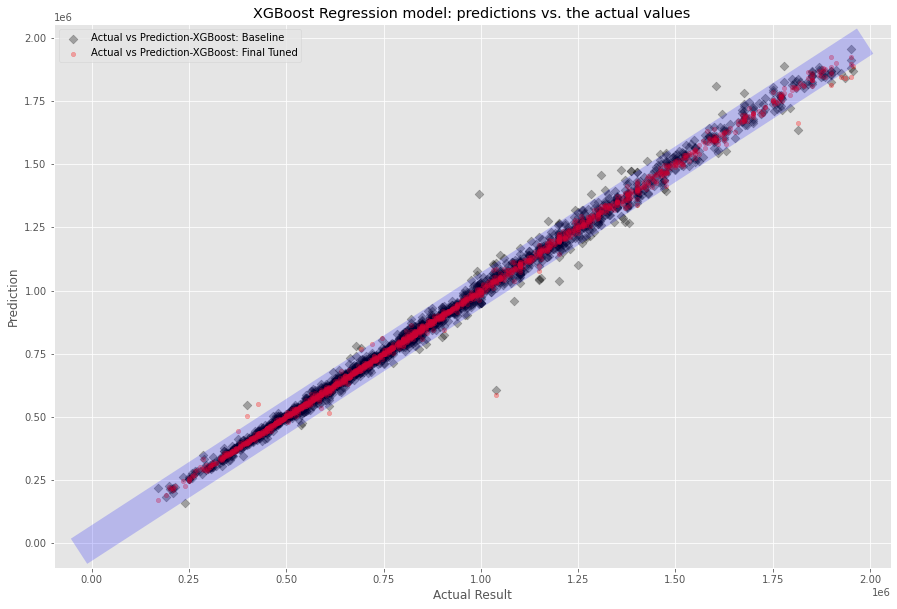

In [56]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_xgb, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction-XGBoost: Baseline')
plt.scatter(y_test,y_pred_xgb_cv_2, color='red', marker='o', s=20, alpha=0.3,label='Actual vs Prediction-XGBoost: Final Tuned')
plt.title('XGBoost Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [57]:
final_xgb = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_xgb.round(3), 'SalePrice_Predicted_Tuned': y_pred_xgb_cv_4.round(3)})
final_xgb.head(30).sort_values(by='SalePrice_Actual', ascending=False)

,SalePrice_Actual,SalePrice_Predicted_baseline,SalePrice_Predicted_Tuned
6219,1900000,1.854092e+06,1.841912e+06
696,1770000,1.765785e+06,1.769156e+06
2560,1600000,1.599576e+06,1.606960e+06
3249,1525000,1.537418e+06,1.530836e+06
1223,1478000,1.475509e+06,1.472644e+06
6756,1438000,1.437684e+06,1.460015e+06
1904,1375000,1.326438e+06,1.362140e+06
7028,1300000,1.320759e+06,1.310634e+06
6904,1216000,1.171061e+06,1.201658e+06
3982,1080000,1.063162e+06,1.077971e+06


## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 2nd Model: Decision Tree Regression, let's see if we can further improve our prediction using below algorithm:

 * Stacking.
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))